# Scientific Paper Template (Jupyter Notebook) - Edit this title

* **Authors:** Oscar Chivers

* **Student ID:** 190012624

* **Date:** 04/04/24

**Abstract:**

[Write a concise summary of your research here.]

**Keywords:** [List relevant keywords here.]

# GitHub Repository
- **GitHub Link:** https://github.com/OscarChivers/UA_Final

- **Google Drive Link for data:**

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


The data that is needed for the lab has been uploaded to the GitHub repo, but it has also been put in a google drive. If you choose to use the data from the GitHub, if you put the data in a folder called 'data', then you should not need to change the file paths in the workboom. If you choose to download the data with the google drive, please click on the google drive link, and all the data needed for this lab is in there. You will need to download them to a file and then run the code. You may have to change the paths when calling the files but if you put the data in a file with the following path 'data' then you should not need to do this.

Some of the maps that are coded do not come up in the printed version. However when you run the code they will appear. Regardless, the maps that are the final maps are all pasted as images so they will be present.

**Table of Contents:** 

* Section 1
* Section 2
* Section n


## Introduction

Provide a clear introduction to your research, outlining the problem you're addressing,  the research question, its significance, and relevant background information. Include citations using appropriate formatting (e.g., BibTeX, Markdown footnotes).re of 


One target of the Sustainable Development Goals (SDGs) is aimed at reducing the number of traffic accidents (Klanjcic et al., 2021). To reduce the number of traffic accidents, it is important to know where the traffic accidents are taking place to be able to propose appropriate solutions to solve the issues. This research project hopes to shed light on the spatial distribution of car accidents in Cambridge hopes to provide reasons for the spatial variation in car accidents. 

Cambridge is a city located in East Anglia and there are various reasons as to why it was selected. Firstly, for data availability reasons: Cambridge has excellent data availability regarding road traffic collisions (Cambridgeshire County Council, n.d.), which made it a good city to study. Secondly, cycling is an important part of Cambridge’s identity, and there are large numbers of people who cycle in the city. It is in the only city in the UK where the percentage of people who cycle regularly outweighs the percentage of people who do not (MacMichael, 2018). Whilst people choosing to cycle rather than drive benefits the environment through reduced carbon dioxide emissions, cyclists also share the roads with cars and can be at risk of car accidents. 

Whilst the overall research project is aimed at examining the spatial distribution of car accidents in Cambridge, there are research questions that may provide more detail as to why this distribution is the case. The research questions are as follows: 

1.	Is there a correlation between road network connectivity and crashes?
2.	To what extent are cycle lanes successful at reducing the number of car-bike accidents?
3.	Should cycle lanes be expanded in Cambridge?

The first research question was informed by Sun et al. (2018), who suggested that intersections in areas with high betweenness centralities were more likely to have traffic accidents located than low betweenness centrality intersections. Betweenness centrality is a measure of connectivity. In network analysis, nodes have high betweenness centrality if they are often used in a shortest path between two nodes in the network (Wang et al., 2013). This research hopes to determine if there are more crashes at nodes with higher betweenness centrality throughout the whole network, rather than just at intersections. Since there are also many cyclists in Cambridge, this research will also determine if the connectivity is a problem for the collisions between bikes and cars, not just all types of collisions. 

Cyclists are often more liable to serious injuries if they are involved in an accident with a car on the road, seeing as they do not have the ‘protective metallic shell of car drivers’ (Marqués and Hernández-Herrador, 2017, p.181). Luckily, there are areas of Cambridge which have designated cycle lanes, most of these lanes are a just marked on the road with paint and the symbol of a bicycle to remind cars that they are not allowed to be in that area (Cambridge County  Council, n.d.). There are competing ideas as to whether these cycle lanes are actually a benefit to cyclists safety. On one hand, they provide designated area for cyclists where cars should not be allowed to enter. However a disadvantage is that it can cause cyclists to be less wary of cars around them (ibid.). Studies on the effectiveness of bike lanes have shown that they can result in a decrease of car-bike collisions, however studies have also shown that an increase of bike lanes can also result in more accidents between bikes and cars (Chen et al., 2012). Therefore, this research hopes to add to the literature and determine if cycle lanes help to decrease the number of accidents that occur between cars and bicycles. Furthermore, Bonera et al. (2022) suggested that crashes between cars and bicycles were due to cars passing them too quickly, or took place at T-Junctions, therefore this research will also produce descriptive statistics to show if there are any significant locations where car-bike collisions may be likely to occur. Lastly, it is important not only to determine if there are less crashes that occur, but also if the crashes that occur are less severe. So this research hopes to discern whether there are changes to the severity of the accident if it takes place in a bike lane or on a shared road. 

The third research question is aimed at joining together the first 2 research questions. It will examine the betweenness centrality and crash data, whilst also looking at the locations of bike lanes in Cambridge. Hopefully all of the proceeding information will determine if there are cycle lane expansions that should take place to improve the safety of road users in Cambridge. 


## Methodology

Describe the methods used in your research, including data sources, collection procedures, analysis techniques, and any relevant software tools. Include code cells for data loading, preprocessing, and key steps in your analysis pipeline.


In [2]:
# Import necessary libraries for your project
import numpy as np
import pandas as pd
import geopandas as gpd

import folium
from folium import plugins
from folium.plugins import MeasureControl
from branca.colormap import linear
from branca import colormap
from branca import colormap as cm

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

import networkx as nx

import matplotlib.pyplot as plt

import osmnx as ox
from IPython.display import Image

import seaborn as sns

This research project used various research methods for data collection, analysis and presentation. The following sections will show the data that was downloaded, and processed through code and markdown cells. 

### Data Download

The road and cycle networks of Cambridge were extracted using the OSMnx package in python. OSMnx downloads information regarding the nodes and edges of the street network. When the Cambridge road network was initially downloaded, there were over 3,000 nodes in the Cambridge street network, which was far too many to run analysis. Therefore, nodes were cleaned up that are in intersections within a 15 metre buffer of each other, it will also remove the dead ends but keep the overall shape of the graph. After this, there were only 1,665 nodes in the graph which made the analysis much smoother. A second OSMnx network was downloaded, which was the cycle network of Cambridge. This also required some cleaning to select the edges which were just the cycle lanes. 

In [3]:
#Load Cambridge Drive Network
C_drive = ox.graph_from_place("Cambridge, UK", network_type="drive")

# get a GeoSeries of consolidated intersections
#cleaning up nodes:
#code adapted from: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/04-simplify-graph-consolidate-nodes.ipynb
G_proj = ox.project_graph(C_drive)
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)

#select nodes from this graph and make a GDF
nodes = ox.graph_to_gdfs(G2, edges=False)


#Load Cambridge Bike Network 
C_bike = ox.graph_from_place("Cambridge, UK", network_type="bike")

#select edges from this graph and make a GDF so I can then select the bike paths
edges = ox.graph_to_gdfs(C_bike, nodes=False)

#Select just bike paths
cycle_path = edges[edges['highway'] == 'cycleway']


A dataset containing locations of car accidents and some information about the type of accident was downloaded from the Cambridgeshire and Peterborough Open Data Portal (Cambridgeshire Insight, n.d.). Crashes from 2017 and 2018 were downloaded as separate datasets and bound together. Before cleaning of variables and checking for null values. The dataset also had to be clipped by extent to just the City of Cambridge. This was done using a shapefile with the City of Cambridge boundary that was already downloaded on this hard drive. 

In [4]:
#load in Crashes dataset and subset the variables that are of interest 
crashes = pd.read_csv("data/Final/RTC Location 2018.csv")
subset_crashes = crashes[['Date', 'Police_ref', 'Easting', 'Northing', 'Severity', 'Casualties', 'Pedestrian', 'Cycles',
                          'Road_Type', 'Speed_Lim', 'Junct_det', 'Weather', 'Day', 'Local_Auth'
                         ]]

#load in 2017 crasg datset and subset variables of interest 
crashes_2017 = pd.read_csv("data/Final/RTC Location 2017.csv")
crashes_2017_sub = crashes_2017[['Date', 'Police_ref', 'Easting', 'Northing', 'Severity', 'Casualties', 'Pedestrian', 'Cycles',
                          'Road_Type', 'Speed_Lim', 'Junct_det', 'Weather', 'Day', 'Local_Auth'
                         ]]

#bind the two dataframes 
merged_df = pd.concat([subset_crashes, crashes_2017_sub])

#check for NAs 
nan_easting = merged_df['Easting'].isna().sum()
nan_northing = merged_df['Northing'].isna().sum()

#make the geodataframe with projected crs as my data is in easting and northing 
geometry = gpd.points_from_xy(merged_df['Easting'], merged_df['Northing'])
gdf = gpd.GeoDataFrame(merged_df, crs="EPSG:27700", geometry=geometry)

#load dataframe border 
border = gpd.read_file('data/Final/cambs_and_southCambs.shp')

#Select the border of just the City of Cambridge from the shapefile 
city = border[border['ltla22nm'] == 'Cambridge']

#Select only the crashes that are within the city - name the dataframe city_crash
city_single = city.unary_union 
city_crash = gdf[gdf.intersects(city_single)] 

A folium map was produced, however to do this there had to be data processing. Folium only works with coordinates in latitude and longitudes, therefore these had to be changed from the city_crash gdf. 

In [5]:
#Make a copy of city_crash - so that the original dataframe is not changed, nor are the geometries.
folium_df = city_crash.copy()

#change geometries
folium_df = folium_df.to_crs('EPSG:4326')

#extract the latitude and longitude values from the geometries
folium_df['longitude'] = folium_df.geometry.x
folium_df['latitude'] = folium_df.geometry.y

### Methods of analysis 

This section will explain the main methods of analysis used, alongside key pipeline code needed for the analysis and results section. 

One key method that was used was betweenness centrality calculations of the street network nodes. This was done using the NetworkX package on python. The betweenness centrality was important as it identified the key nodes in the Cambridge driving network which are used in the shortest route when trying to get from one place to another. The betweenness centrality measures were categorised into 5 categories added to the dataset. A buffer was created around these nodes of 25 metres, this value was obtained from trail and error. Then, a point in polygon analysis was conducted. This determined the number of crashes that took place in each 25m buffer. 

In [6]:
#The code in this cell takes a long time to run, please be patient with this cell. 

#betweenness centrality measures to make the histogram for categorisation 
b_centrality = nx.betweenness_centrality(G2, weight="length")
#weight is given to length to give long edges more strength

#make an attribute 
nx.set_node_attributes(G2, b_centrality, name="bc")
nodes = ox.graph_to_gdfs(G2, edges=False)

#function that applies an if statement to make a new category in the dataframe showing a categorical value of  betweeness centrality
def betweeness_cent(row):
   if row['bc'] == 0:
      return 'Not connected'
   elif 0 < row['bc'] <= 0.05:
      return 'Low Connectivity'
   elif 0.05 < row['bc'] <= 0.1:
       return 'Med Connectivity'
   elif 0.1 < row['bc'] <= 0.2:
       return 'High Connectivity'
   else:
      return 'Extreme Connectivity'

#applying the function to my dataframe
nodes.apply(betweeness_cent, axis=1)

#adding the applied function 
nodes['bc_category'] = nodes.apply(betweeness_cent, axis=1)

#change crs
nodes = nodes.to_crs('EPSG:27700')

#make copy 
nodes_copy = nodes.copy()

#make buffer of 25m 
nodes_copy['geometry'] = nodes_copy.geometry.buffer(25)

#PIP analysis
crashes_w_buffer =  city_crash.sjoin(nodes_copy, how="inner", predicate='intersects')

A similar network X data manipulation method was to locate where there were bike crashes in a bike lane. To do this, first the crashes which were only with bikes had to be selected from the city_crash dataframe. Then a copy was made to make geometry changes and a buffer of 15 metres was made around the bike lanes. Then crashes that were within the bike lanes were extracted and added to the bike_crash dataframe as a Boolean value. 

A folium map was also made to create a heatmap of the bike accidents in Cambridge. 

In [7]:
#Select only crashes between bikes and cars
bike_crash = city_crash[city_crash['Cycles'] > 0]

#changing crs of bike_crash so that the buffer will work (needs to be in metres not degrees)
cycle_path = cycle_path.to_crs('EPSG:27700')

#Making a copy before making buffer and changing geometries
cycle_path_copy = cycle_path.copy()
cycle_path_copy['geometry'] = cycle_path_copy.geometry.buffer(15)

#make boolean variable if the crash happened in a bike lane
cycle_single = cycle_path_copy.unary_union  #merges bike lanes to a single object
bike_crash['Inside_Cycle_Lane'] = bike_crash.intersects(cycle_single) # Select the  points data that intersect with bike lanes

In [23]:
bike_folium = bike_crash.copy()

#change geometries
bike_folium = bike_folium.to_crs('EPSG:4326')

#extract the latitude and longitude values from the geometries
bike_folium['longitude'] = bike_folium.geometry.x
bike_folium['latitude'] = bike_folium.geometry.y

Throughout the process, maps were used to display the spatial variation in crashes throughout Cambridge. For example, maps will be used to show a heatmap of the car accidents, or locations of just bike accidents. Explore maps are an important part of this analysis because it presents a unique opportunity for the reader to corroborate the findings of this report and see for themselves where many of the crashes took place. There was also a plot of different dataframes superimposed on top of one another. 

Descriptive statistics were used as an important part of the methodology, they were used to support the maps shown and to provide some important reasons as to why there is spatial variation in the crashes in Cambridge. Different types of descriptive statistics were used in the results section of this report. Both univariate and bivariate descriptive statistics were used in the forms of box plots, bar charts, scatterplots and cross tabulations. These different types of descriptive statistics were used because of the nature of the data: some data were categorical and others were continuous. ar. 

All key pipeline analysis code for the rest of the project is in the following cells of the methodology section. Therefore the results section should have little to no analysis code necessary. 


In [8]:
#Code Pipeline to Make BarChart for number of crashes per connectivity category:

#Group crashes by betweenness centrality category
crashes_per_category = crashes_w_buffer.groupby('bc_category').size().reset_index(name='total_crashes_per_bc')

#Counts of nodes in each Category 
bc_counts = nodes[['bc_category']].value_counts().reset_index(name="Count of centrality nodes")

#binding these two dataframes
Connectivity_Crash_df= pd.merge(crashes_per_category, bc_counts, on="bc_category")

#dividing total crashes by count of nodes to get average crash rate per connectivity node
Connectivity_Crash_df["Average_no_crash_per_node"] = Connectivity_Crash_df["total_crashes_per_bc"]/Connectivity_Crash_df["Count of centrality nodes"]

#Sorting the columns by highest to lowest average number of crashes
Connectivity_Crash_df = Connectivity_Crash_df.sort_values(by='Average_no_crash_per_node',ascending=True)

In [42]:
#Code Pipeline to determine bike crashes per connectivity category:

#Group crashes by betweenness centrality category
bike_crashes_cat = crashes_w_buffer[crashes_w_buffer['Cycles'] > 0].groupby('bc_category').size().reset_index(name='bike_crashes_per_bc')

#binding these two dataframes
bike_crash_df= pd.merge(bike_crashes_cat, bc_counts, on="bc_category")

#dividing total crashes by count of nodes to get average crash rate per connectivity node
bike_crash_df["Average_no_crash_per_node"] = bike_crash_df["bike_crashes_per_bc"]/Connectivity_Crash_df["Count of centrality nodes"]

#Sorting the columns by highest to lowest average number of crashes
bike_crash_df = bike_crash_df.sort_values(by='Average_no_crash_per_node',ascending=True)

## Results

Illustrate your findings organised, using clear and concise text, informative tables, and good visualizations. Explain the meaning and significance of your results, making connections to the research questions or any hypotheses outlined in the introduction.


### Heatmap and map of crash locations in the City

Folium Map which shows the heatmap of the crashes in the city and also maps clusters of crashes. Below it is a simple explore map showing the locations of crashes. 
> This folium map is interactive, please explore the different clusters of crashes throughout the city. 

In [9]:
m = folium.Map([52.205276, 0.119167], zoom_start=12)
location=folium_df[["latitude","longitude"]]

plugins.MarkerCluster(location).add_to(m)
plugins.HeatMap(location).add_to(m)
m


In [10]:
city_crash.explore()

The folium heatmap shows that there are many crashes that are clustered in the centre of the city. The clusters that are created on the initial zoom level suggest that there are just under 300 crashes that take place in the city centre. Please click on the different clusters to explore the spatial variation of crashes further. 

The simple explore map provides a bit more evidence on the spatial variation of the crashes. The explore map shows that there in most areas of Cambridge, there has been a collision with a car. Other than the crashes in the centre of Cambridge, there are many crashes that are located on the main roads. Shown by the dark orange roads on the open street map.

These two maps clearly show that there are lots car accidents across Cambridge, therefore it is important to find out what the different reasons behind these crashes are so that changes can be made to reduce the number of crashes that are taking place and to make the city a safer place for everyone.  


### Road Network Connectivity and Crashes 

The cells below show:

* The spatial variation of betweenness centrality nodes in Cambridge
* A bar chart to show how connectivty and crashes are related
* A bar chart to show how connectivity and bike crashes are related
* A box and whisker plot to show whether the severity of crashes changes with different levels of betweenness centrality
* A box and whisker plot to show whether different speed limits have different distributions of betweenness centrality.

In [11]:
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 0.75})

Text(0.5, 1.0, 'Average Total Crashes per Betweenness Centrality Category')

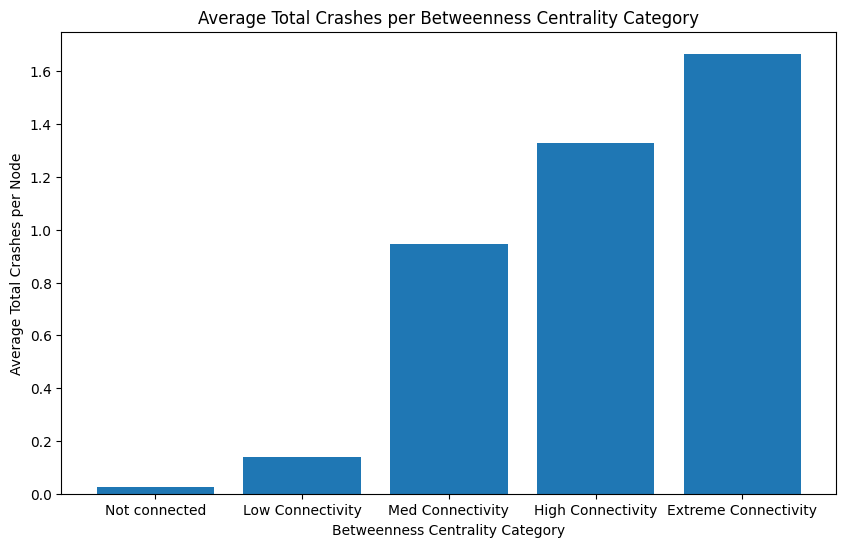

In [43]:
#Code to plot a bar Chart of Average crashes per betweenness centrality category

plt.figure(figsize=(10, 6))
plt.bar(Connectivity_Crash_df["bc_category"], Connectivity_Crash_df["Average_no_crash_per_node"])
plt.xlabel('Betweenness Centrality Category')
plt.ylabel('Average Total Crashes per Node')
plt.title('Average Total Crashes per Betweenness Centrality Category')

Text(0.5, 1.0, 'Average Bike Crashes per Betweenness Centrality Category')

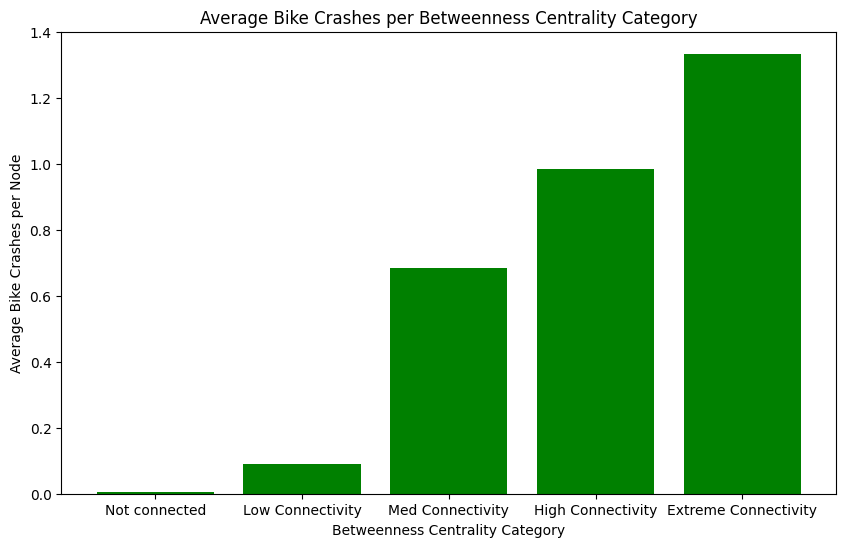

In [45]:
#Code to plot a bar Chart of Average crashes per betweenness centrality category

plt.figure(figsize=(10, 6))
plt.bar(bike_crash_df["bc_category"], bike_crash_df["Average_no_crash_per_node"], color = "Green")
plt.xlabel('Betweenness Centrality Category')
plt.ylabel('Average Bike Crashes per Node')
plt.title('Average Bike Crashes per Betweenness Centrality Category')

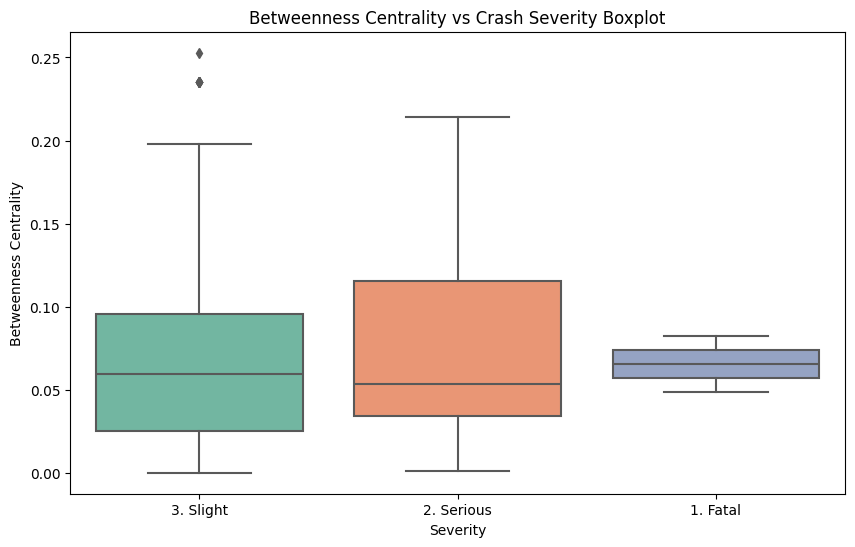

In [13]:
# Box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='bc', data=crashes_w_buffer, palette='Set2')
plt.title('Betweenness Centrality vs Crash Severity Boxplot')
plt.xlabel('Severity')
plt.ylabel('Betweenness Centrality')
plt.show()

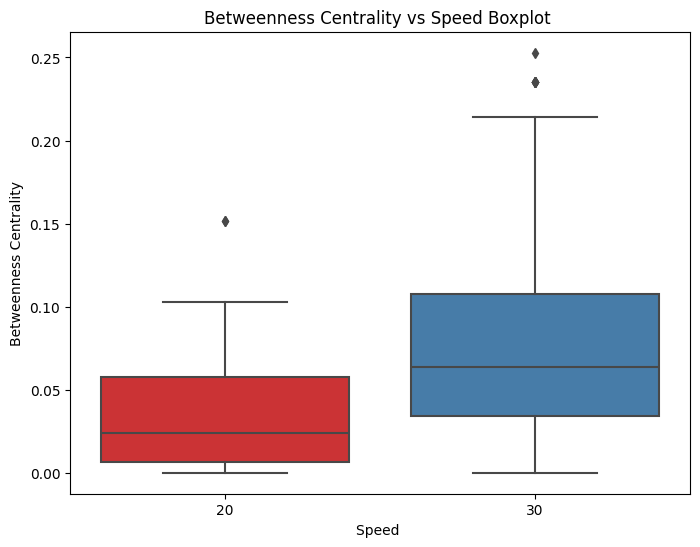

In [14]:
# Box and whisker plot - subset only 20mph and 30mph
speed_subset = crashes_w_buffer[(crashes_w_buffer['Speed_Lim'] == 20 ) | (crashes_w_buffer['Speed_Lim'] == 30)]
speed_subset

plt.figure(figsize=(8, 6))
sns.boxplot(x='Speed_Lim', y='bc', data=speed_subset, palette='Set1')
plt.title('Betweenness Centrality vs Speed Boxplot ')
plt.xlabel('Speed ')
plt.ylabel('Betweenness Centrality')
plt.show()

Firstly, the explore map shows that there is clearly a large difference in the overall network connectivity of Cambridge. There is one road that runs from North to South that contains most of the nodes which are in the highest betweenness centrality categories. This map, combined with the bar chart below is significant in showing the problem of road network connectivity in Cambridge. 

The bar chart of total crashes (blue bar chart) clearly shows that there is a positive correlation between high betweenness centrality measures and the number of crashes that take place. As betweenness centrality, and therefore connectivity increases, the number of predicted crashes taking place at each node increases. Nodes with an extremely high betweenness centrality (in this case more than 0.2) can expect to see an average of 1.6 crashes per node. Whereas nodes which are not connected at all or have low connectivity (less than 0.05) can expect to see far fewer crashes at each node. This helps to answer the first research question, which was aimed at determining if there is a correlation between road network connectivity and crashes. 

The bar chart of bike crashes per betweenness centrality (green bar chart) shows a similar story for connectivity and bike crashes. The car-bike collisions are more likely to take place in areas where the betweenness centrality is higher. Although there are less crashes between cars and bikes in general at each node. 

There is an argument that this result is somewhat self explanatory since areas of high betweenness centrality are likely to have more vehicles travelling on those roads, since they are part of the fastest route networks between different place. There is however, significance to these results. The explore map, clearly shows that there are only a few roads in the whole network that have a high betweenness centrality, and therefore are areas of high connectivity. It is likely, therefore, that there is an issue with the road network in Cambridge. 

The first boxplot – “Betweenness centrality vs Crash Severity” shows little difference in the severity of accidents and betweenness centrality values. There were very few fatal collisions, so the main focus of the box plot was on the “slight” and “serious” severity categories. The box and whisker plot shows that there is little difference between the distribution of betweenness centrality measures and crash severity between these two categories due to the very similar medians, interquartile ranges and ranges. 

This project also determined if there are different speed limits at different betweenness centralities. This is shown in the boxplot titled “Betweenness Centrality vs Speed Boxplot”. The boxplots suggest that there speed limits of 20mph are often associated with low betweenness centrality measures, however speed limits of 30mph are associated with much higher betweenness centralities. This is shown by the higher median of the 30mph boxplot, and the much higher upper limits of both the range and interquartile range. This is significant as lower speed limits in areas where there is lots of car flow may reduce the possibility of crashes taking place. 


### Determining the success of cycle lanes 

The following results show the: 

* A heatmap of collisions of bikes with cars
* Locations of where bikes were hit and whether they were in a bike lane or not
* The total counts and percentages of cyclists hit in bike lanes vs not in a bike lane
* Severity difference of crashes in bike lanes
* The location of crash difference between bike lane or not

In [25]:
bike_m = folium.Map([52.205276, 0.119167], zoom_start=12)
location=bike_folium[["latitude","longitude"]]

plugins.MarkerCluster(location).add_to(bike_m)
plugins.HeatMap(location).add_to(bike_m)
bike_m


In [15]:
bike_crash.explore('Inside_Cycle_Lane', cmap='Dark2', tiles="cartodbpositron")

In [16]:
#Get counts and percentage of crashes in and out of cyclelanes
cyclelane_counts = bike_crash['Inside_Cycle_Lane'].value_counts()
cyclelane_percentage = bike_crash['Inside_Cycle_Lane'].value_counts(normalize=True)*100

#make a dataframe 
counts_df = pd.DataFrame({'In Cyle Lane':cyclelane_counts.index, 'Count':cyclelane_counts.values, 'Percentage':cyclelane_percentage.values})
counts_df

In Cyle Lane  Count  Percentage
0         False    243   63.446475
1          True    140   36.553525

<Figure size 800x600 with 0 Axes>

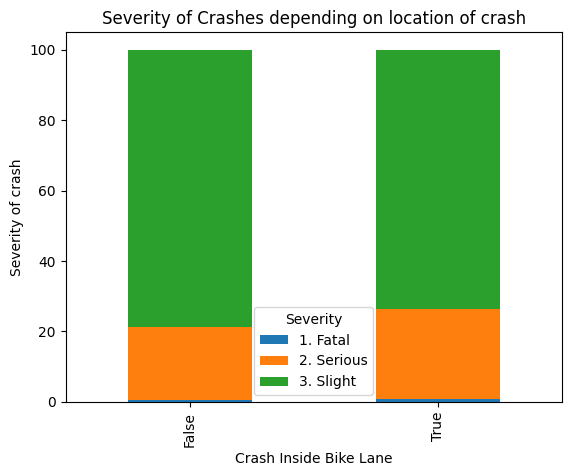

In [17]:
cross_tab = pd.crosstab(bike_crash['Severity'], bike_crash['Inside_Cycle_Lane'])

cross_tab_perc = cross_tab.copy()
cross_tab_perc.iloc[:, :1]= (cross_tab.iloc[:, :1] / 243)*100
cross_tab_perc.iloc[:, 1:2] = (cross_tab.iloc[:, 1:2] / 140)*100

severity_bar = cross_tab_perc.T

plt.figure(figsize=(8, 6))
severity_bar.plot(kind='bar', stacked=True)
 
plt.xlabel('Crash Inside Bike Lane')
plt.ylabel('Severity of crash')
 
# title of plot
plt.title('Severity of Crashes depending on location of crash')
plt.show()

In [18]:
junct_true = bike_crash[bike_crash['Inside_Cycle_Lane'] == True]['Junct_det'].value_counts(normalize=True)*100
junct_true

Junct_det
3. T & Stag Jct                                      32.857143
1. Roundabout                                        27.142857
0. Not within 20m of junction                        19.285714
2. Mini roundabout                                    7.857143
6. Crossroads                                         5.000000
8. Pri Drive                                          4.285714
9. Other                                              2.142857
5. Slip Road                                          0.714286
7. Junction - more than 4 arms (not a roundabout)     0.714286
Name: proportion, dtype: float64

In [19]:
junct_false = bike_crash[bike_crash['Inside_Cycle_Lane'] == False]['Junct_det'].value_counts(normalize=True)*100
junct_false

Junct_det
3. T & Stag Jct                                      41.152263
0. Not within 20m of junction                        30.041152
1. Roundabout                                        13.991770
6. Crossroads                                         7.818930
8. Pri Drive                                          3.703704
2. Mini roundabout                                    1.646091
9. Other                                              1.234568
7. Junction - more than 4 arms (not a roundabout)     0.411523
Name: proportion, dtype: float64

The heatmap suggest that there are, like the total collision map, many car-bike accidents that take place in the centre of town. It also shows many collisions that take place in South-East Cambridge. It seems as though it is close to the train station. This could be a result of lots of people taking their bikes on the train and then cycling from the station to their place of work. Therefore in the route that is close to the station there are more collisions between cars and bikes. 

The explore map, shows that there are various different locations where there has been an accident between a car and a bike that took place. Although it seems as there are areas of cycle lanes which show a lot of car-bike accidents. For example, there is a road to the south of Cambridge that shows a large number of car-bike accidents that took place in cycle lanes. The explore map is important in this analysis because it gives a background to the nature of car-bike accidents. That is, it seems as though there are more accidents that happen out of cycle lanes, although there are still quite a few car-bike accidents that take place even though cycle lanes are present in some areas. 

The next dataframe shows that there are differences in the numbers of car-bike accidents that take place within, and outside cycle lanes. 243(63%) of car-bike collisions take place outside of cycle lanes, compared to 140(37%) collisions that take place within the cycle lanes. This is important to note as although there are less accidents that take place in the cycle lanes, there is still quite a significant number of accidents that happen in cycle lanes, over one third of bike accidents take place in the cycle lanes. This gives part of an answer to the second research question. There is some success, given that less crashes take place in cycle lanes, but there is a significant proportion of crashes still happening in these areas. 

The stacked bar chart compares the severity of accidents that take place within, and outside bike lanes. The bar chart shows that there is no significant differences in the severity of crashes between the two. This shows an area that bike lanes could be more successful in. 

Finally, the last two cells make two arrays, showing where the crash happened. In both cases, the main locations that accidents happened were at a T Junction, a roundabout or an area of straight road. The difference between the two, is that most of the accidents in cycle lanes happen at T Junctions (33%) or roundabouts (27%). In the context of crashes that take place outside of cycle lanes, most accidents happen on the T Junctions (40%) or on a straight (30%). This shows that cycle lanes do a good job of reducing collisions not on straight roads. However, there is clearly much improvement needed for T Junctions. 


### Cycle lane expansion?

In [68]:
high_connectivity = nodes[(nodes['bc_category'] == 'Extreme Connectivity' ) | (nodes['bc_category'] == 'High Connectivity')]

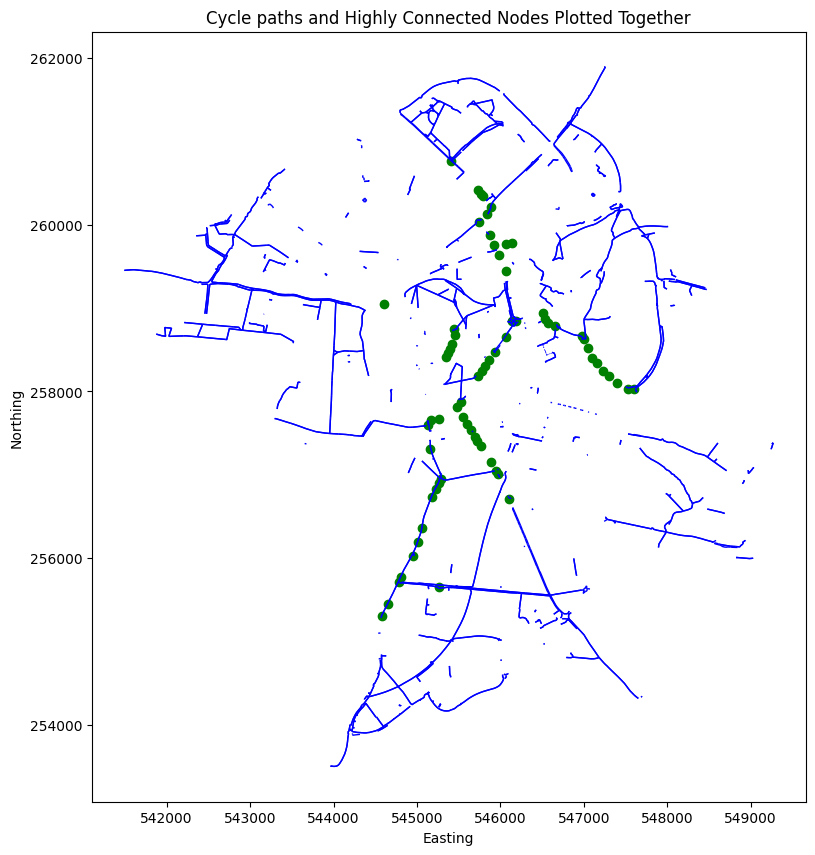

In [67]:
#Superimposed plots:
#Code taken from https://stackoverflow.com/questions/58739620/overlay-two-subplots-in-the-same-subplot-matplotlib 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot bike lanes
cycle_path.plot(ax=ax, linewidth=1, color='blue')

high_connectivity.plot(ax=ax, marker='o', color = 'green')

# Customize the plot
plt.title('Cycle paths and Highly Connected Nodes Plotted Together')
plt.xlabel('Easting')
plt.ylabel('Northing')

plt.show()

Should cycle lanes be expanded in Cambridge?

There are clear reasons, and areas where the cycle lanes should be expanded in Cambridge. The plot which shows the cycle paths superimposed with the high and very high betweenness centrality nodes shows that there are clearly areas for expansion. Many of these high betweenness centrality nodes do not have cycle lanes alongside them. From the results in the previous sections, it would be beneficial to cyclists if there were more cycle lanes put in the locations here first. This plot is good as it shows where there locations of cycle lane expansion should be given the highest priority.


## Discussion

The positive relationship between betweenness centrality and number of crashes in the results clearly shows that Cambridge is not a well connected city. The results found in this study support the results found by Sun et al. (2018). Sun et al. (2018) showed that this took place at intersections of high betweenness centrality, this research has also shown that this correlation is true for the whole network. This is shown though the one long street of nodes, where there is a high betweenness centrality, and these are all associated with higher frequency of crashes compared to the streets where the betweenness centrality is low. One reason why Cambridge does not have a well-connected street network is because it is not in a grid or parallel format, which are the best street networks for overall connectivity (Wang et al., 2013). Clearly, it would not be feasible, or even possible to reroute the whole of Cambridge’s street network, however as a result of this research small changes could be made to improve it. For example, one improvement to make would be to improve the capacity of some of the other main roads around Cambridge, so that they could be better connected and there would be less congestion on the roads that currently have a high betweenness centrality. 

Whilst this research found that there was no difference in severity of accidents at higher betweenness centrality measures, it found that there was clearly a difference in the speed limits at different betweenness centrality measures. High betweenness centrality measures were often always associated with a 30mph speed limit, where 20mph speed limits were only associated with low betweenness centrality measures. It is likely that this is the case because the 20mph zones were in residential areas, which are often not well-connected street network areas. However, Taylor et al. (2000) found that the frequency of road traffic accidents increases with speed limit increases. Therefore, another way to reduce the number of accidents that take place at high betweenness centrality measures would be to reduce the speed limit in these areas. Whilst this may lead to overall slower travel times, a decrease in traffic accidents would be extremely important. 

This research has shown that there is a clear link between betweenness centrality and crash frequency and that there are methods of reducing the number of crashes at these locations. Improvements could be made by either improving the network or reducing the speed limit in the locations of high betweenness centrality, something that could be implemented quite easily and would have a beneficial effect. 

In literature, there is much debate about the success of bike lanes on the number of accidents between cars and cyclists and the safety of cyclists. This research sought to determine what difference bike lanes have on the frequency of crashes (Chen et al. 2012). The results suggest that there are fewer crashes in cycle lanes than outside of them, but it seems as though there is still a significant percentage (37%) of collisions that take place in cycle lanes. This could be due to the perceived confidence that cyclists have when they are in cycle lanes (Cambridge County Council, n.d.) therefore they are less risk aware and whilst the car is alert to the cyclist due to the bike lane, the cyclist may be putting themselves at risk. Another important result from the study is that there is no significant differences in safety of cyclists if there is a crash in a cycle lane compared to outside the cycle lane. This may also be due to cyclist’s confidence when in cycle lanes, however there could be other reasons. One reason is because cycle lanes are often just painted onto the ground, therefore whilst being a visual reminder of the possibility of cyclists, there is still no barrier to stopping collisions. Protected bike lanes (Mohn, 2022) would be one way to both increase the safety of cyclists in terms of the severity of accidents, but also to reduce the number of crashes. There are already some protected bike lanes in Cambridge (Laker, 2017), but it is important to continue to improve the infrastructure to encourage cycle uptake and improve safety. 

The findings also support the statement that collisions between cars and bikes are either due to cars passing too quickly, or T-junctions (Bonera et al., 2022). This research improves on these findings. One success of bike lanes is that it reduces the number of collisions that are due to cars passing bikes too quickly. However, most accidents that still take place are at T-junctions or roundabouts. A possible improvement is increased education to car drivers and cyclists on how to properly give way to each other at T-junctions or improving right of way knowledge at roundabouts. Therefore, cars and bikes would be more aware of themselves and each other, and also know how to safely conduct themselves on the road. Another way to reduce crashes at T-junctions is to provide cycle boxes, for bikes to wait in when trying to make a turn so that they are not in the same lane as cars when waiting to turn (Bonera et al., 2022). These changes should be implemented on a larger scale in Cambridge to reduce the number of collisions that take place at T-junctions or roundabouts. 


This research has shown that bicycle lanes definitely have a positive impact on cyclists in the city, and since there are so many cyclists in Cambridge, the recommendations should be implemented to improve cyclist’s safety even further. Whilst this research has focussed on the benefits of cycle lanes, there are clearly places where cycle lanes should be implemented in Cambridge. For example, the heatmap and explore map showing the collisions between bikes and cars shows that there are lots of crashes near the train station. The main roads around the train station do not have cycle lanes. This is something that would greatly increase the safety of cyclists on their way from the train station to their place of work. 

Another area where cycle lanes could be used positively is to reduce bike collisions in highly connected areas would be to improve the bike lanes. This would be a benefit as car-bike collisions happen at areas that have high betweenness centrality. Furthermore, when comparing betweenness centrality and bike lanes, there are limited amounts of bike lanes were high betweenness centrality measures occur. 

Limitations and further research: 

One limitation to this project was in creating buffers around the nodes. Some of the nodes still overlapped, after they had been cleaned up. Therefore if a crash was in an area where two nodes were overlapping, it would count into both of them. Which may have skewed the results slightly. 

Another limitation was to do with calculating the success of cycle lanes and whether they reduced collisions between cars and bikes. Obviously the number of collisions in bike lanes was lower, however there may have been more context needed to this value, because it is likely that there were more roads which did not have a cycle lane. So possibly the value needed to be normalised in some way. 

Further research would benefit from a KMeans analysis as to socio-economic variables behind crashes. Whether there are more crashes in areas where people have access to a car, or if deprivation has an impact on the number of crashes in an area. Another direction for research would be to understand the reasons behind why there were so many crashes in the centre of Cambridge, whether it was due to high footfall and pedestrian crashes? Or if the streets are narrower therefore making driving conditions harder. 



## Conclusion

This research project has found that there is a varying spatial distribution of car accidents around Cambridge, and that there are many reasons for this distribution. The main findings are that collisions often happen in areas of high betweenness centrality, for cars, and car-bike collisions. The study has also found that bike lanes are relatively successful in reducing the number of collisions. 

As a result of this study, to reduce collisions in Cambridge, there are certain steps that the council, or local people can take to be more safe. Firstly, speed limits should be reduced in areas where there is high betweenness centrality and therefore a large number of cars and bikes travelling. This will hopefully go some way to reducing the number of crashes in these locations. Another method to reduce the number of crashes in areas of high betweenness centrality is to encourage bike lanes to be built in these areas. There are definitely dedicated cycle paths that could be built in high betweenness centrality areas which could greatly reduce the number of crashes between cars and bikes. Finally, cycle paths are a benefit to the community, but there could be more dedicated cycle paths around Cambridge to reduce the number of collisions that still take place in them and to promote cyclist safety. Another way to keep cyclists safe is to increase education around cycle and driving manoeuvres to encourage awareness of one another on the road. 

This study has contributed to the academia surrounding street networks relationship with car collisions. It has also discussed areas for improvement for cyclists safety in the city of Cambridge, an area where cyclists and cars often interact with each other. 



## Appendix

Include any additional information and code not included in the main body of the paper but may be necessary. This could include:

* Raw data tables
* Additional figures or tables
* Supporting code


**Information about the city_crash dataframe**

In [20]:
city_crash.head()

Date  Police_ref  Easting  Northing   Severity  Casualties  \
3   20180103    18257077   546231    257858  3. Slight           1   
9   20180104    18256231   546238    257859  3. Slight           1   
11  20180105    18257015   545200    258267  3. Slight           1   
12  20180105    18259273   544638    259600  3. Slight           1   
13  20180105    18259870   546395    261212  3. Slight           1   

    Pedestrian  Cycles              Road_Type  Speed_Lim        Junct_det  \
3            0       0  6. Single carriageway         20    6. Crossroads   
9            0       1  6. Single carriageway         30    6. Crossroads   
11           1       0  6. Single carriageway         30  3. T & Stag Jct   
12           0       0  6. Single carriageway         20    6. Crossroads   
13           0       1  6. Single carriageway         30  3. T & Stag Jct   

                          Weather           Day Local_Auth  \
3      1. Fine without high winds  4. Wednesday  E07000008   
9   2. Raining without high winds   5. Thursday  E07000008   
11     1. Fine without high winds     6. Friday  E07000008   
12     1. Fine without high winds     6. Friday  E07000008   
13     1. Fine without high winds     6. Friday  E07000008   

                         geometry  
3   POINT (546231.000 257858.000)  
9   POINT (546238.000 257859.000)  
11  POINT (545200.000 258267.000)  
12  POINT (544638.000 259600.000)  
13  POINT (546395.000 261212.000)

**Information about the bike_crash dataframe**

In [21]:
bike_crash.head()

Date  Police_ref  Easting  Northing    Severity  Casualties  \
9   20180104    18256231   546238    257859   3. Slight           1   
13  20180105    18259870   546395    261212   3. Slight           1   
18  20180106    18258382   546422    257021   3. Slight           1   
19  20180107    18256894   547601    258012  2. Serious           1   
35  20180109    18257452   546461    257215   3. Slight           1   

    Pedestrian  Cycles              Road_Type  Speed_Lim  \
9            0       1  6. Single carriageway         30   
13           0       1  6. Single carriageway         30   
18           0       1  6. Single carriageway         30   
19           0       1          1. Roundabout         30   
35           0       1          1. Roundabout         30   

                        Junct_det                        Weather          Day  \
9                   6. Crossroads  2. Raining without high winds  5. Thursday   
13                3. T & Stag Jct     1. Fine without high winds    6. Friday   
18  0. Not within 20m of junction     1. Fine without high winds  7. Saturday   
19                  1. Roundabout     1. Fine without high winds    1. Sunday   
35             2. Mini roundabout     1. Fine without high winds   3. Tuesday   

   Local_Auth                       geometry  Inside_Cycle_Lane  
9   E07000008  POINT (546238.000 257859.000)               True  
13  E07000008  POINT (546395.000 261212.000)              False  
18  E07000008  POINT (546422.000 257021.000)              False  
19  E07000008  POINT (547601.000 258012.000)              False  
35  E07000008  POINT (546461.000 257215.000)              False

**A map of the cycle lanes in Cambridge**

In [22]:
cycle_path.explore()

## References

You could use an appropriate citation management tool (e.g., Zotero, Mendeley) to create BibTeX entries for your references. Paste the generated BibTeX code here, and you can use tools like `pandoc` (if necessary) to convert it to the desired reference format (e.g., APA, MLA).
